## Map of claims for cardiovascular disease

In [1]:
# import base packages into the namespace for this program
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly as py
import seaborn as sns  # for plotting
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import MinMaxScaler

### Import dataset

In [2]:
# import dataset
claims = pd.read_csv('Medicare_Claims_data.csv', sep = ',')  

In [3]:
# check dataset
claims.head()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2008,NM,New Mexico,Medicare,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Age,75+,C1,T1,MD101,Crude,BOC03,AGE08,35,"(34.52088095200048, -106.24058098499967)"
1,2008,NY,New York,Medicare,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,MD101,Crude,BOC01,OVR01,36,"(42.82700103200045, -75.54397042699964)"
2,2008,NY,New York,Medicare,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Non-Hispanic White,C1,T1,MD101,Crude,BOC04,RAC01,36,"(42.82700103200045, -75.54397042699964)"
3,2008,NM,New Mexico,Medicare,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Race,Non-Hispanic White,C1,T1,MD101,Crude,BOC04,RAC01,35,"(34.52088095200048, -106.24058098499967)"
4,2008,NY,New York,Medicare,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,MD101,Crude,BOC02,GEN01,36,"(42.82700103200045, -75.54397042699964)"


In [4]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        42640 non-null  int64  
 1   LocationAbbr                42640 non-null  object 
 2   LocationDesc                42640 non-null  object 
 3   DataSource                  42640 non-null  object 
 4   PriorityArea1               42640 non-null  object 
 5   PriorityArea2               42640 non-null  object 
 6   PriorityArea3               42640 non-null  object 
 7   PriorityArea4               42640 non-null  object 
 8   Category                    42640 non-null  object 
 9   Topic                       42640 non-null  object 
 10  Indicator                   42640 non-null  object 
 11  Data_Value_Type             42640 non-null  object 
 12  Data_Value_Unit             42640 non-null  object 
 13  Data_Value                  421

### 2008

In [5]:
#Create new dataframe 
#Return the rows that have 2008 listed for Year AND category equal to cardiovascular disease
claims_2008 = claims[(claims['Year'] == 2008) & (claims['Category'] == 'Cardiovascular Diseases')]
#from prior dataframe select break_out_category equal to overall
claims_2008 = claims_2008[(claims_2008['Break_Out_Category'] == 'Overall')]

In [6]:
#sum data value grouped by state
state_2008 = claims_2008.groupby('LocationAbbr')['Data_Value'].sum()

In [7]:
state_2008

LocationAbbr
AK    120.9
AL    163.7
AR    166.5
AZ    124.6
CA    125.2
CO    108.0
CT    154.5
DC    154.9
DE    146.4
FL    150.8
GA    155.9
HI    122.6
IA    121.4
ID    100.9
IL    160.1
IN    155.4
KS    125.3
KY    175.9
LA    186.8
MA    163.6
MD    157.6
ME    136.8
MI    170.0
MN    137.9
MO    151.5
MS    173.6
MT    104.4
NC    148.5
ND    116.9
NE    119.5
NH    126.3
NJ    177.6
NM    115.3
NV    127.8
NY    160.6
OH    165.3
OK    153.7
OR    108.9
PA    172.0
RI    156.7
SC    151.6
SD    113.3
TN    167.3
TX    155.3
US    150.5
UT     99.9
VA    146.3
VT    116.5
WA    119.3
WI    133.3
WV    190.3
WY    108.6
Name: Data_Value, dtype: float64

In [8]:
# change series to dataframe
state_2008 = state_2008.to_frame()


# reset index of dataframe
state_2008 = state_2008.reset_index()

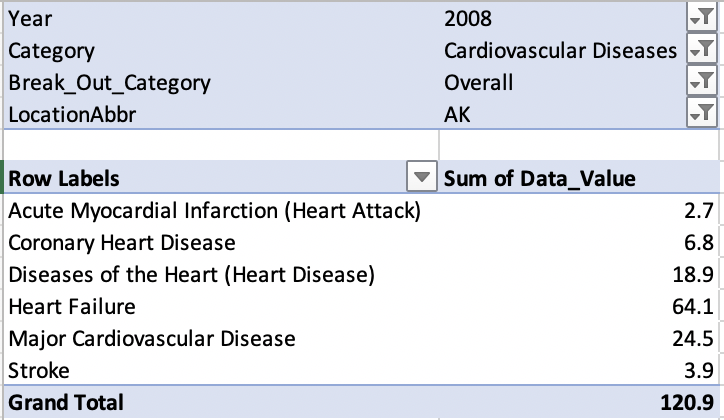

In [9]:
state_2008

,LocationAbbr,Data_Value
0,AK,120.9
1,AL,163.7
2,AR,166.5
3,AZ,124.6
4,CA,125.2
5,CO,108.0
6,CT,154.5
7,DC,154.9
8,DE,146.4
9,FL,150.8


In [10]:
#https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
#https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn

#Use Min Max Scaler to normalize data
scaler = MinMaxScaler()
state_2008[['Data_Value']] = scaler.fit_transform(state_2008[['Data_Value']])


In [11]:
state_2008

,LocationAbbr,Data_Value
0,AK,0.232301
1,AL,0.705752
2,AR,0.736726
3,AZ,0.273230
4,CA,0.279867
5,CO,0.089602
6,CT,0.603982
7,DC,0.608407
8,DE,0.514381
9,FL,0.563053


In [12]:
# Define elements for Choropleth map
data = dict(type = 'choropleth',
            colorscale = 'sunset',
            locations = state_2008['LocationAbbr'],
            locationmode= 'USA-states',
            z=state_2008['Data_Value'],
            colorbar = {'title': 'Value'})
            #marker = dict(line = dict(color = 'rgb(255,255,255)', width=2)))

In [13]:
# Define Layout and map
layout = dict(title = 'Overall Cardiovascular Disease in 2008', titlefont=dict(size=25), width=1000,
    height=600, geo=dict(scope='usa', showlakes=False))

map = go.Figure(data=data, layout = layout)

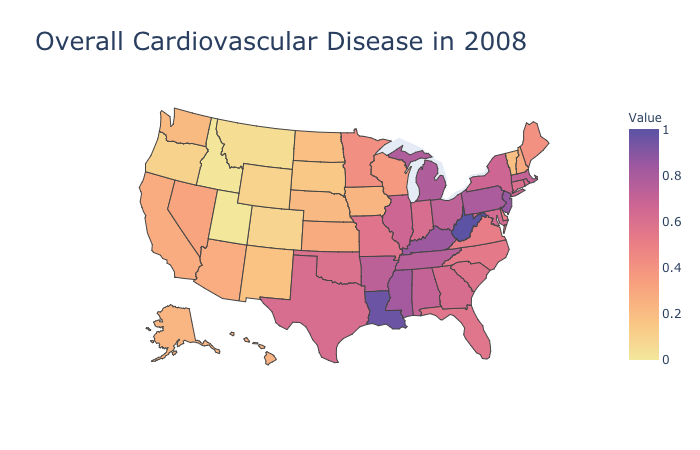

In [14]:
# Plot Map
#iplot(map,filename='plot_2008')
map.show(renderer="png")
map.write_image("2008_normalized.png", scale=3)
#py.offline.plot(map)

### 2004

In [15]:
#Create new dataframe 
#Return the rows that have 2004 listed for Year AND category equal to cardiovascular disease
claims_2004 = claims[(claims['Year'] == 2004) & (claims['Category'] == 'Cardiovascular Diseases')]
#from prior dataframe select break_out_category equal to overall
claims_2004 = claims_2004[(claims_2004['Break_Out_Category'] == 'Overall')]

#sum data value grouped by state
state_2004 = claims_2004.groupby('LocationAbbr')['Data_Value'].sum()

# change series to dataframe
state_2004 = state_2004.to_frame()
# reset index of dataframe
state_2004 = state_2004.reset_index()

#Use Min Max Scaler to normalize data
state_2004[['Data_Value']] = scaler.fit_transform(state_2004[['Data_Value']])

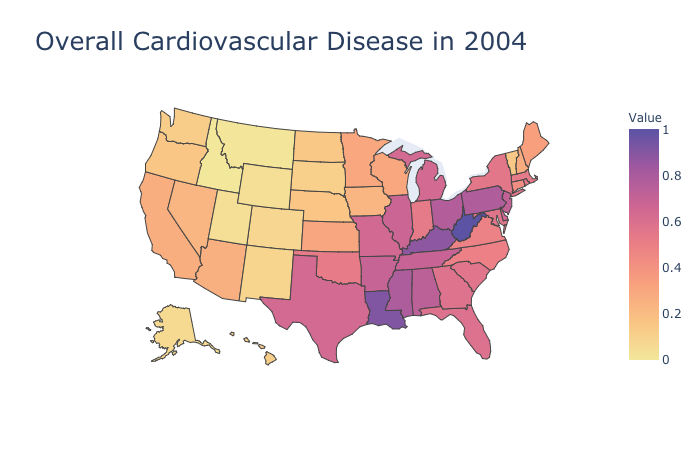

In [16]:
# Define elements for Choropleth map
data = dict(type = 'choropleth',
            colorscale = 'sunset',
            locations = state_2004['LocationAbbr'],
            locationmode= 'USA-states',
            z=state_2004['Data_Value'],
            colorbar = {'title': 'Value'})
    
# Define Layout and map
layout = dict(title = 'Overall Cardiovascular Disease in 2004', titlefont=dict(size=25), width=1000,
    height=600, geo=dict(scope='usa', showlakes=False))

map = go.Figure(data=data, layout = layout)

# Plot Map
#iplot(map,filename='plot_2004')
map.show(renderer="png")
map.write_image("2004_normalized.png", scale=3)

### 2005

In [17]:
#Create new dataframe 
#Return the rows that have 2005 listed for Year AND category equal to cardiovascular disease
claims_2005 = claims[(claims['Year'] == 2005) & (claims['Category'] == 'Cardiovascular Diseases')]
#from prior dataframe select break_out_category equal to overall
claims_2005 = claims_2005[(claims_2005['Break_Out_Category'] == 'Overall')]

#sum data value grouped by state
state_2005 = claims_2005.groupby('LocationAbbr')['Data_Value'].sum()

# change series to dataframe
state_2005 = state_2005.to_frame()
# reset index of dataframe
state_2005 = state_2005.reset_index()

#Use Min Max Scaler to normalize data
state_2005[['Data_Value']] = scaler.fit_transform(state_2005[['Data_Value']])


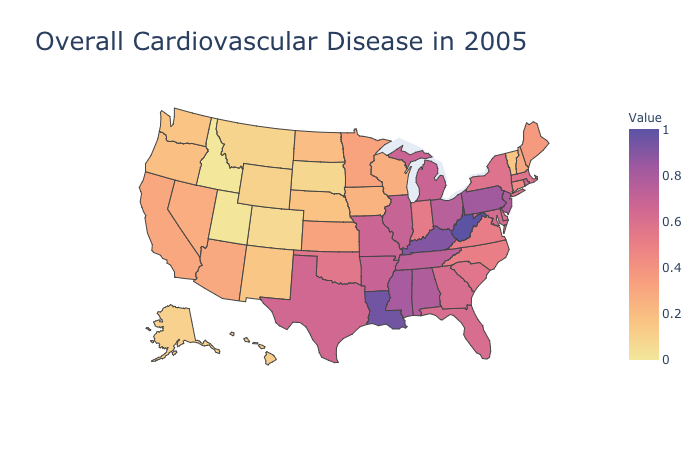

In [18]:
# Define elements for Choropleth map
data = dict(type = 'choropleth',
            colorscale = 'sunset',
            locations = state_2005['LocationAbbr'],
            locationmode= 'USA-states',
            z=state_2005['Data_Value'],
            colorbar = {'title': 'Value'})
    
# Define Layout and map
layout = dict(title = 'Overall Cardiovascular Disease in 2005', titlefont=dict(size=25), width=1000,
    height=600, geo=dict(scope='usa', showlakes=False))

map = go.Figure(data=data, layout = layout)

# Plot Map
#iplot(map,filename='plot_2005')
map.show(renderer="png")
map.write_image("2005_normalized.png", scale=3)

### 2006

In [19]:
#Create new dataframe 
#Return the rows that have 2006 listed for Year AND category equal to cardiovascular disease
claims_2006 = claims[(claims['Year'] == 2006) & (claims['Category'] == 'Cardiovascular Diseases')]
#from prior dataframe select break_out_category equal to overall
claims_2006 = claims_2006[(claims_2006['Break_Out_Category'] == 'Overall')]

#sum data value grouped by state
state_2006 = claims_2006.groupby('LocationAbbr')['Data_Value'].sum()

# change series to dataframe
state_2006 = state_2006.to_frame()
# reset index of dataframe
state_2006 = state_2006.reset_index()

#Use Min Max Scaler to normalize data
state_2006[['Data_Value']] = scaler.fit_transform(state_2006[['Data_Value']])

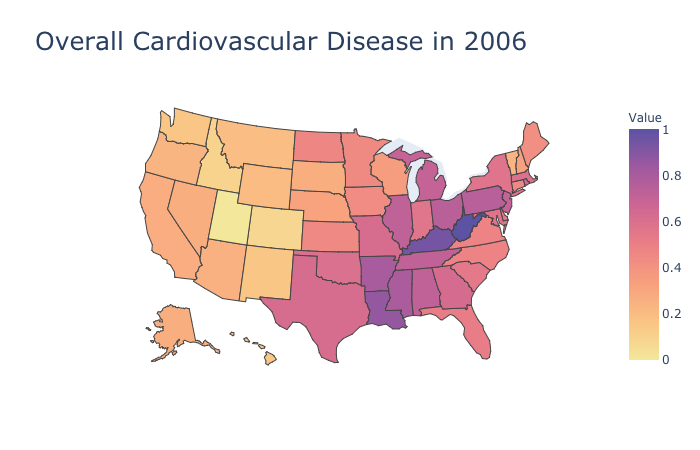

In [20]:
# Define elements for Choropleth map
data = dict(type = 'choropleth',
            colorscale = 'sunset',
            locations = state_2006['LocationAbbr'],
            locationmode= 'USA-states',
            z=state_2006['Data_Value'],
            colorbar = {'title': 'Value'})
    
# Define Layout and map
layout = dict(title = 'Overall Cardiovascular Disease in 2006', titlefont=dict(size=25), width=1000,
    height=600, geo=dict(scope='usa', showlakes=False))

map = go.Figure(data=data, layout = layout)

# Plot Map
#iplot(map,filename='plot_2006')
map.show(renderer="png")
map.write_image("2006_normalized.png", scale=3)

### 2007

In [21]:
#Create new dataframe 
#Return the rows that have 2007 listed for Year AND category equal to cardiovascular disease
claims_2007 = claims[(claims['Year'] == 2007) & (claims['Category'] == 'Cardiovascular Diseases')]
#from prior dataframe select break_out_category equal to overall
claims_2007 = claims_2007[(claims_2007['Break_Out_Category'] == 'Overall')]

#sum data value grouped by state
state_2007 = claims_2007.groupby('LocationAbbr')['Data_Value'].sum()

# change series to dataframe
state_2007 = state_2007.to_frame()
# reset index of dataframe
state_2007 = state_2007.reset_index()

#Use Min Max Scaler to normalize data
state_2007[['Data_Value']] = scaler.fit_transform(state_2007[['Data_Value']])


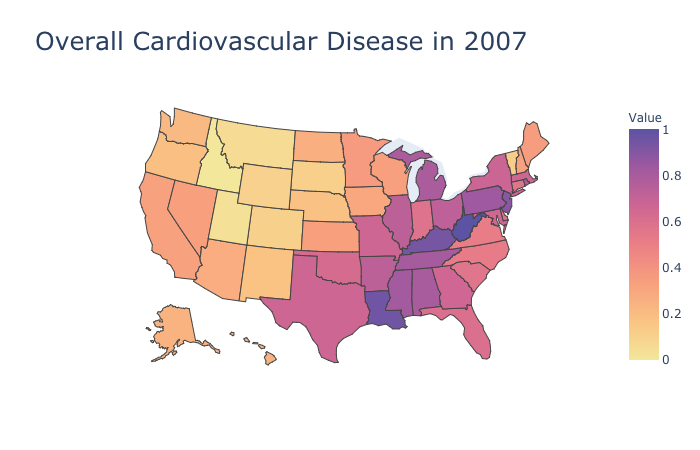

In [22]:
# Define elements for Choropleth map
data = dict(type = 'choropleth',
            colorscale = 'sunset',
            locations = state_2007['LocationAbbr'],
            locationmode= 'USA-states',
            z=state_2007['Data_Value'],
            colorbar = {'title': 'Value'})
    
# Define Layout and map
layout = dict(title = 'Overall Cardiovascular Disease in 2007', titlefont=dict(size=25), width=1000,
    height=600, geo=dict(scope='usa', showlakes=False))

map = go.Figure(data=data, layout = layout)

# Plot Map
#iplot(map,filename='plot_2007')
map.show(renderer="png")
map.write_image("2007_normalized.png", scale=3)

### 2009

In [23]:
#Create new dataframe 
#Return the rows that have 2009 listed for Year AND category equal to cardiovascular disease
claims_2009 = claims[(claims['Year'] == 2009) & (claims['Category'] == 'Cardiovascular Diseases')]
#from prior dataframe select break_out_category equal to overall
claims_2009 = claims_2009[(claims_2009['Break_Out_Category'] == 'Overall')]

#sum data value grouped by state
state_2009 = claims_2009.groupby('LocationAbbr')['Data_Value'].sum()

# change series to dataframe
state_2009 = state_2009.to_frame()
# reset index of dataframe
state_2009 = state_2009.reset_index()

#Use Min Max Scaler to normalize data
state_2009[['Data_Value']] = scaler.fit_transform(state_2009[['Data_Value']])


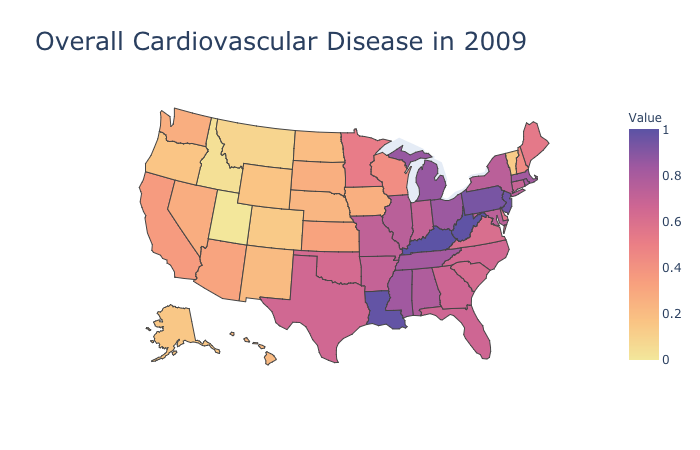

In [24]:
# Define elements for Choropleth map
data = dict(type = 'choropleth',
            colorscale = 'sunset',
            locations = state_2009['LocationAbbr'],
            locationmode= 'USA-states',
            z=state_2009['Data_Value'],
            colorbar = {'title': 'Value'})
    
# Define Layout and map
layout = dict(title = 'Overall Cardiovascular Disease in 2009', titlefont=dict(size=25), width=1000,
    height=600, geo=dict(scope='usa', showlakes=False))

map = go.Figure(data=data, layout = layout)

# Plot Map
#iplot(map,filename='plot_2009')
map.show(renderer="png")
map.write_image("2009_normalized.png", scale=3)

### 2010

In [25]:
#Create new dataframe 
#Return the rows that have 2010 listed for Year AND category equal to cardiovascular disease
claims_2010 = claims[(claims['Year'] == 2010) & (claims['Category'] == 'Cardiovascular Diseases')]
#from prior dataframe select break_out_category equal to overall
claims_2010 = claims_2010[(claims_2010['Break_Out_Category'] == 'Overall')]

#sum data value grouped by state
state_2010 = claims_2010.groupby('LocationAbbr')['Data_Value'].sum()

# change series to dataframe
state_2010 = state_2010.to_frame()
# reset index of dataframe
state_2010 = state_2010.reset_index()

#Use Min Max Scaler to normalize data
state_2010[['Data_Value']] = scaler.fit_transform(state_2010[['Data_Value']])

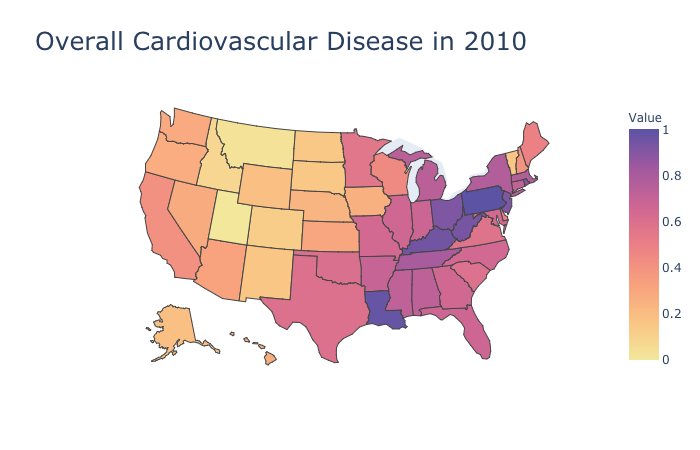

In [26]:
# Define elements for Choropleth map
data = dict(type = 'choropleth',
            colorscale = 'sunset',
            locations = state_2010['LocationAbbr'],
            locationmode= 'USA-states',
            z=state_2010['Data_Value'],
            colorbar = {'title': 'Value'})
    
# Define Layout and map
layout = dict(title = 'Overall Cardiovascular Disease in 2010', titlefont=dict(size=25), width=1000,
    height=600, geo=dict(scope='usa', showlakes=False))

map = go.Figure(data=data, layout = layout)

# Plot Map
#iplot(map,filename='plot_2010')
map.show(renderer="png")
map.write_image("2010_normalized.png", scale=3)

### 2011

In [27]:
#Create new dataframe 
#Return the rows that have 2011 listed for Year AND category equal to cardiovascular disease
claims_2011 = claims[(claims['Year'] == 2011) & (claims['Category'] == 'Cardiovascular Diseases')]
#from prior dataframe select break_out_category equal to overall
claims_2011 = claims_2011[(claims_2011['Break_Out_Category'] == 'Overall')]

#sum data value grouped by state
state_2011 = claims_2011.groupby('LocationAbbr')['Data_Value'].sum()

# change series to dataframe
state_2011 = state_2011.to_frame()
# reset index of dataframe
state_2011 = state_2011.reset_index()

#Use Min Max Scaler to normalize data
state_2011[['Data_Value']] = scaler.fit_transform(state_2011[['Data_Value']])

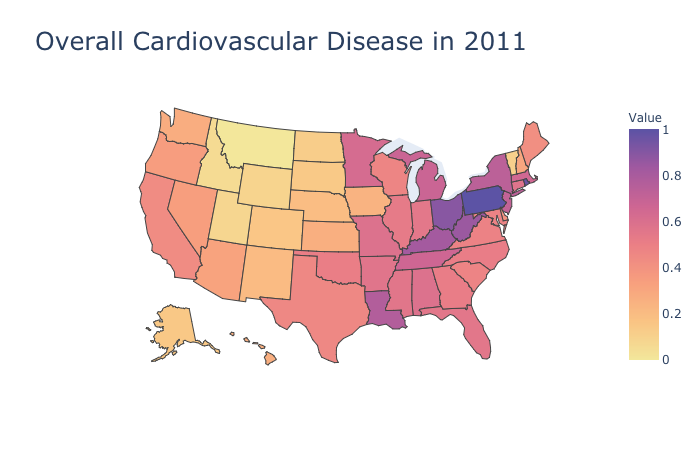

In [28]:
# Define elements for Choropleth map
data = dict(type = 'choropleth',
            colorscale = 'sunset',
            locations = state_2011['LocationAbbr'],
            locationmode= 'USA-states',
            z=state_2011['Data_Value'],
            colorbar = {'title': 'Value'})
    
# Define Layout and map
layout = dict(title = 'Overall Cardiovascular Disease in 2011', titlefont=dict(size=25), width=1000,
    height=600, geo=dict(scope='usa', showlakes=False))

map = go.Figure(data=data, layout = layout)

# Plot Map
#iplot(map,filename='plot_2011')
map.show(renderer="png")
map.write_image("2011_normalized.png", scale=3)

### 2012

In [29]:
#Create new dataframe 
#Return the rows that have 2012 listed for Year AND category equal to cardiovascular disease
claims_2012 = claims[(claims['Year'] == 2012) & (claims['Category'] == 'Cardiovascular Diseases')]
#from prior dataframe select break_out_category equal to overall
claims_2012 = claims_2012[(claims_2012['Break_Out_Category'] == 'Overall')]

#sum data value grouped by state
state_2012 = claims_2012.groupby('LocationAbbr')['Data_Value'].sum()

# change series to dataframe
state_2012 = state_2012.to_frame()
# reset index of dataframe
state_2012 = state_2012.reset_index()

#Use Min Max Scaler to normalize data
state_2012[['Data_Value']] = scaler.fit_transform(state_2012[['Data_Value']])

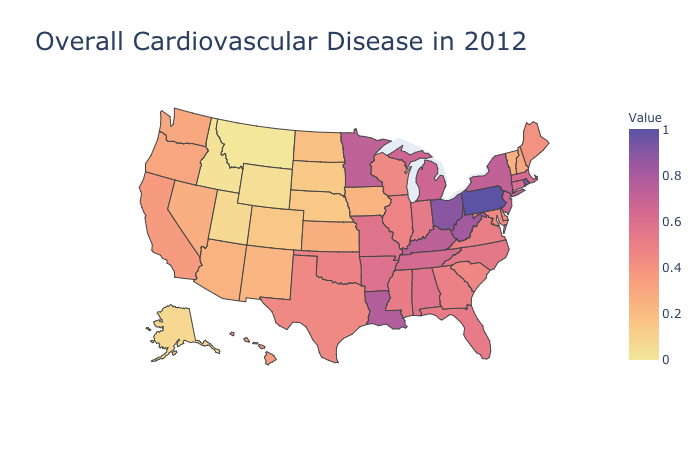

In [30]:
# Define elements for Choropleth map
data = dict(type = 'choropleth',
            colorscale = 'sunset',
            locations = state_2012['LocationAbbr'],
            locationmode= 'USA-states',
            z=state_2012['Data_Value'],
            colorbar = {'title': 'Value'})
    
# Define Layout and map
layout = dict(title = 'Overall Cardiovascular Disease in 2012', titlefont=dict(size=25), width=1000,
    height=600, geo=dict(scope='usa', showlakes=False))

map = go.Figure(data=data, layout = layout)

# Plot Map
#iplot(map,filename='plot_2012')
map.show(renderer="png")
map.write_image("2012_normalized.png", scale=3)

### 2013

In [31]:
#Create new dataframe 
#Return the rows that have 2013 listed for Year AND category equal to cardiovascular disease
claims_2013 = claims[(claims['Year'] == 2013) & (claims['Category'] == 'Cardiovascular Diseases')]
#from prior dataframe select break_out_category equal to overall
claims_2013 = claims_2013[(claims_2013['Break_Out_Category'] == 'Overall')]

#sum data value grouped by state
state_2013 = claims_2013.groupby('LocationAbbr')['Data_Value'].sum()

# change series to dataframe
state_2013 = state_2013.to_frame()
# reset index of dataframe
state_2013 = state_2013.reset_index()

#Use Min Max Scaler to normalize data
state_2013[['Data_Value']] = scaler.fit_transform(state_2013[['Data_Value']])

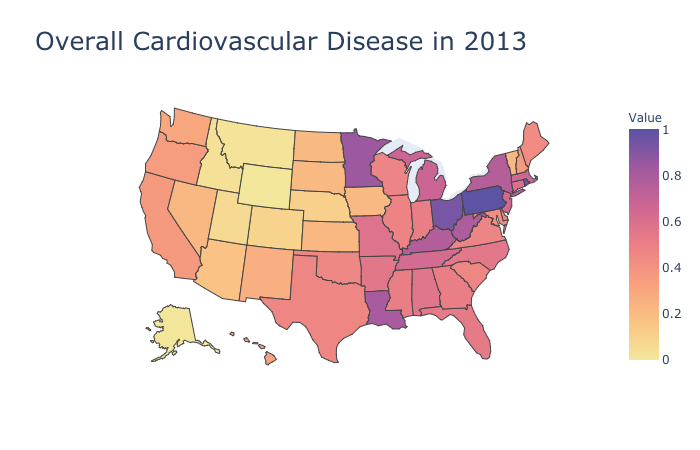

In [32]:
# Define elements for Choropleth map
data = dict(type = 'choropleth',
            colorscale = 'sunset',
            locations = state_2013['LocationAbbr'],
            locationmode= 'USA-states',
            z=state_2013['Data_Value'],
            colorbar = {'title': 'Value'})
    
# Define Layout and map
layout = dict(title = 'Overall Cardiovascular Disease in 2013', titlefont=dict(size=25), width=1000,
    height=600, geo=dict(scope='usa', showlakes=False))

map = go.Figure(data=data, layout = layout)

# Plot Map
#iplot(map,filename='plot_2013')
map.show(renderer="png")
map.write_image("2013_normalized.png", scale=3)